#importing the libraries

In [1]:
pip install umap

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap
import sklearn.cluster as cluster

#reading the data or getting the data

In [3]:
df = pd.read_csv(r"cul_cat1.csv",index_col=[0])
df.head()

,tns_name,previous_name,repeater_name,ra,dec,gb,bonsai_dm,low_ft_68,up_ft_68,low_ft_95,...,log_width_fitb,log_high_freq,log_low_freq,log_peak_freq,log_fre_width,log_redshift,log_in_duration,log_energy,log_luminosity,log_T_B
0,FRB20180725A,180725.J0613+67,non-repeater,93.42,67.07,21.29,716.6,0.0,2.7,0.0,...,-3.528708,2.880871,2.686010,2.783475,2.654057,-0.193318,-0.743748,40.451471,43.284176,29.741595
1,FRB20180727A,180727.J1311+26,non-repeater,197.72,26.42,85.60,642.1,0.0,1.9,0.0,...,-2.856985,2.903199,2.602277,2.693111,2.810184,-0.211253,-0.065109,40.075391,42.683330,29.418756
2,FRB20180729A,180729.J1316+55,non-repeater,199.40,55.58,61.16,108.4,0.0,4.6,0.0,...,-4.000000,2.840545,2.602277,2.720655,2.467101,-2.648161,-1.000975,36.029529,38.868241,26.685375
3,FRB20180729B,180729.J0558+56,non-repeater,89.93,56.50,15.68,318.6,0.0,0.9,0.0,...,-3.503070,2.903199,2.645226,2.817896,2.617914,-0.802538,-0.566616,38.696017,41.644170,28.500531
4,FRB20180730A,180730.J0353+87,non-repeater,57.39,87.19,25.11,849.2,3.3,2.3,6.1,...,-3.329754,2.880356,2.602277,2.684396,2.810947,-0.095607,-0.585606,41.368382,43.908874,30.178429


#UMAP(Uniform Manifold Approximation and Projection) method solving

In [4]:
col=[
    'peak_freq','log_bc_width','log_flux','log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B'
]
cat1_data = df[col]
s_cat1_data=pd.DataFrame(StandardScaler().fit_transform(cat1_data),columns=col)
s_cat1_data.head()

,peak_freq,log_bc_width,log_flux,log_fluence,redshift,fre_width,log_in_duration,log_energy,log_luminosity,log_T_B
0,0.825297,-0.555301,0.480323,-0.139974,0.242795,-0.012350,-1.471694,0.596879,0.770394,0.753209
1,-0.181899,-0.555301,-0.719513,-0.708955,0.190411,0.786521,0.158006,0.314229,0.346949,0.567362
2,0.103223,-1.592633,2.632576,1.270459,-1.047467,-0.658312,-2.089405,-2.726515,-2.341735,-1.006153
3,1.267546,-0.935376,-0.204763,-1.358450,-0.733602,-0.159810,-1.046325,-0.722465,-0.385400,0.038771
4,-0.268407,-0.073818,1.727774,1.729246,0.569486,0.791175,-1.091929,1.286001,1.210650,1.004679


#fit_transformation
first fitting the model UMAP to the data and then applying  the dimensionality reduction, and output the transformed data.

In [5]:
pip install umap-learn


In [6]:
import umap.umap_ as umap


In [7]:
clusterable_embedding = umap.UMAP(
    n_neighbors=24,#8,
    min_dist=0,
    n_components=2,
    random_state=54
).fit_transform(cat1_data)
clf = pd.DataFrame(data = clusterable_embedding, columns = ['x','y'])
clf['repeater']=df['repeater_name'].copy()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<ipython-input-8-686ec04966a3>:7: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['_','non-repeater','repeater'],fontsize=fs-2)


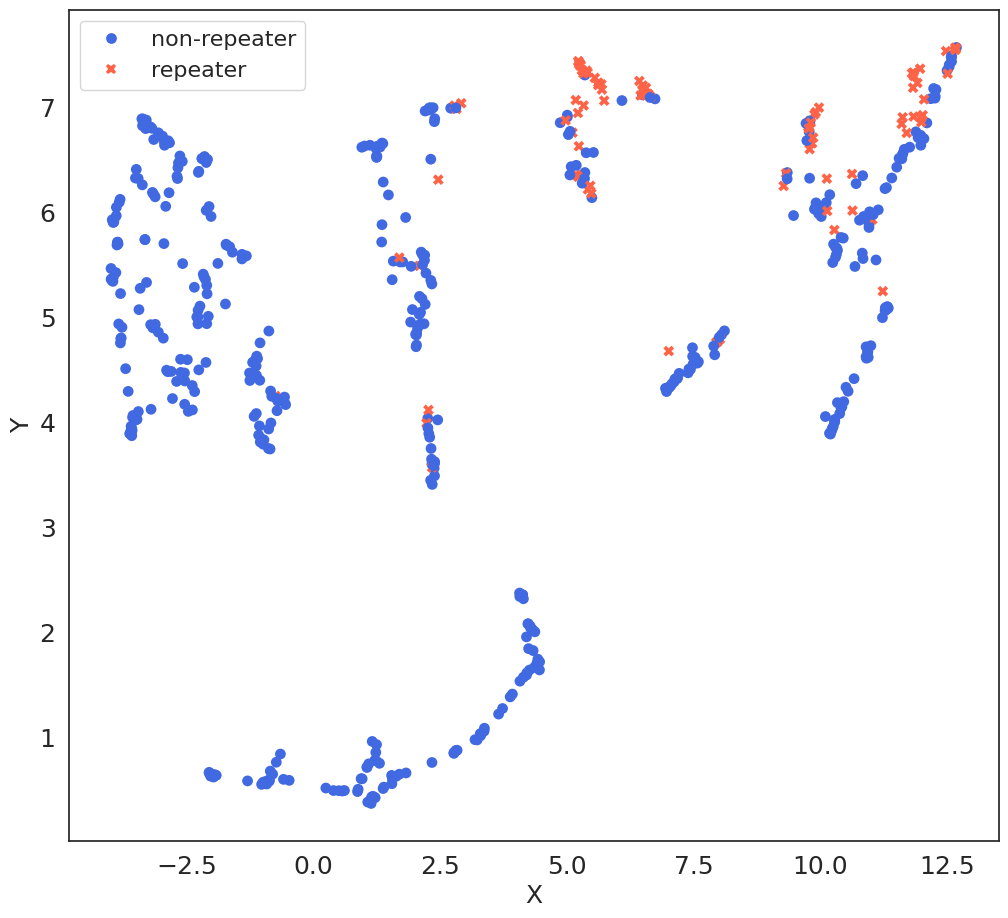

In [8]:
p=12
fs=18
s=5*p
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
color=['royalblue','tomato']
sns.scatterplot(x='x',y='y',hue='repeater',style='repeater',data=clf,linewidth=0,palette=color,s=s)
plt.legend(['_','non-repeater','repeater'],fontsize=fs-2)
#plt.title('UMAP',fontsize=18)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)
plt.tick_params(labelsize=fs)
plt.show()

#HDBSCAN cluster methods and solution

In [9]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.7 MB/s eta 0:00:00


In [12]:
import hdbscan
import unml
labels = hdbscan.HDBSCAN(
    min_cluster_size=22,#22
    min_samples=8,
    #cluster_selection_epsilon=0.5#1.7
).fit_predict(clusterable_embedding)
print(np.max(labels))

UMAP_HD=pd.DataFrame(data=clusterable_embedding,columns=['x','y'])

UMAP_HD['labels']=labels
#UMAP_HD.head()

8


In [13]:
n_labels,nrp_lb,oth_lb,rp_lb=unml.ML_label(labels=UMAP_HD['labels'],observe=df['repeater_name'],threshold=0.2,test=True)
clf['UMAP_HDBSCAN_c']=n_labels
print([nrp_lb,oth_lb,rp_lb])

/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]
/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]
/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]
/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

0         0.0
1         0.0
2         0.0
3         0.0
4    0.029412
5    0.103448
6       0.125
7    0.297872
8    0.666667
Name: rp_ratio, dtype: object
[array([0, 1, 2, 3]), array([4, 5, 6]), array([7, 8])]


/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]
/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]
/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]
/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

<ipython-input-15-37be044831d5>:7: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='x',y='y',hue = 'UMAP_HDBSCAN_c',data=clf,legend='full',
<ipython-input-15-37be044831d5>:14: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(labels=lg,


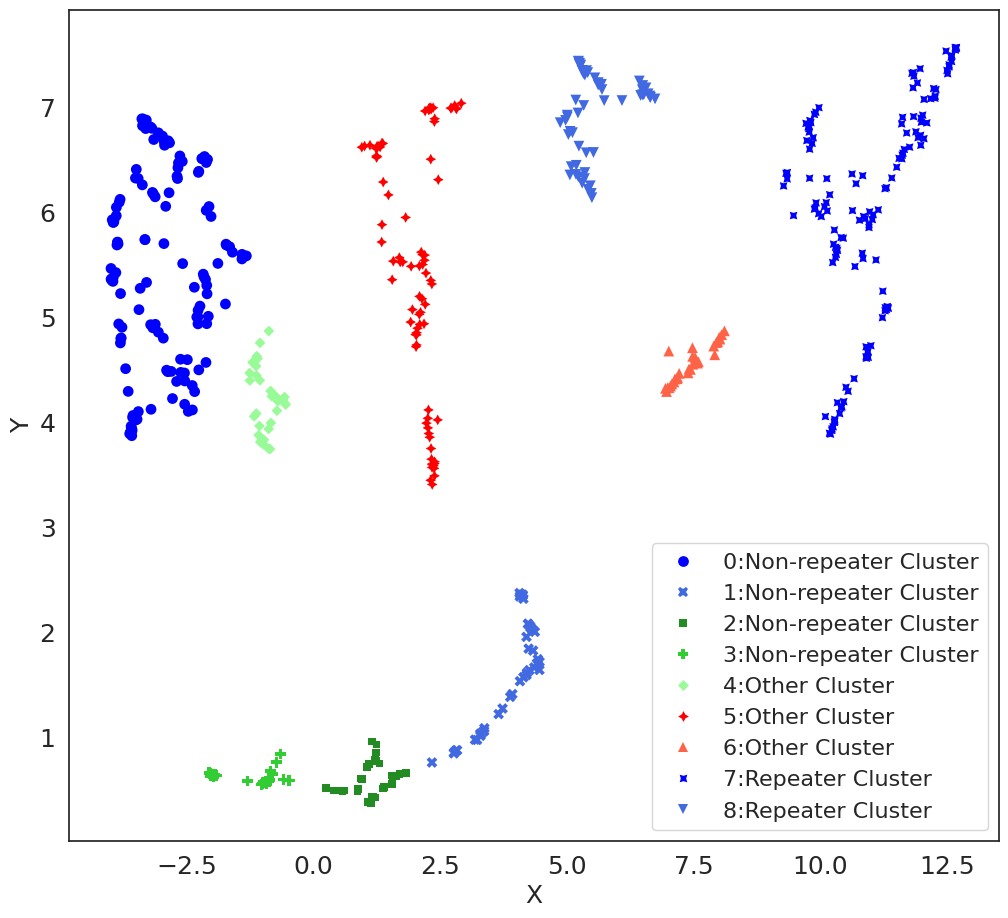

In [15]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
UMAP_HD['labels']=n_labels
color=['blue','royalblue',#'cornflowerblue','lightskyblue',
       'forestgreen','limegreen','palegreen',
       'red','tomato'#,'lightsalmon'
       ]
sns.scatterplot(x='x',y='y',hue = 'UMAP_HDBSCAN_c',data=clf,legend='full',
                linewidth=0,
                palette=color,style='UMAP_HDBSCAN_c',s=s)#'viridis_r')
lg=(['_']+[str(i)+':Non-repeater Cluster' for i in nrp_lb]+
    [str(i)+':Other Cluster' for i in oth_lb]+
    [str(i)+':Repeater Cluster' for i in rp_lb])
plt.legend(labels=lg,
           loc='best',fontsize=fs-2)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)
plt.tick_params(labelsize=fs)

#Getting and comparing the mutual information

<ipython-input-20-1eb10fc49565>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', np.max(n_labels) - np.min(n_labels) + 1)


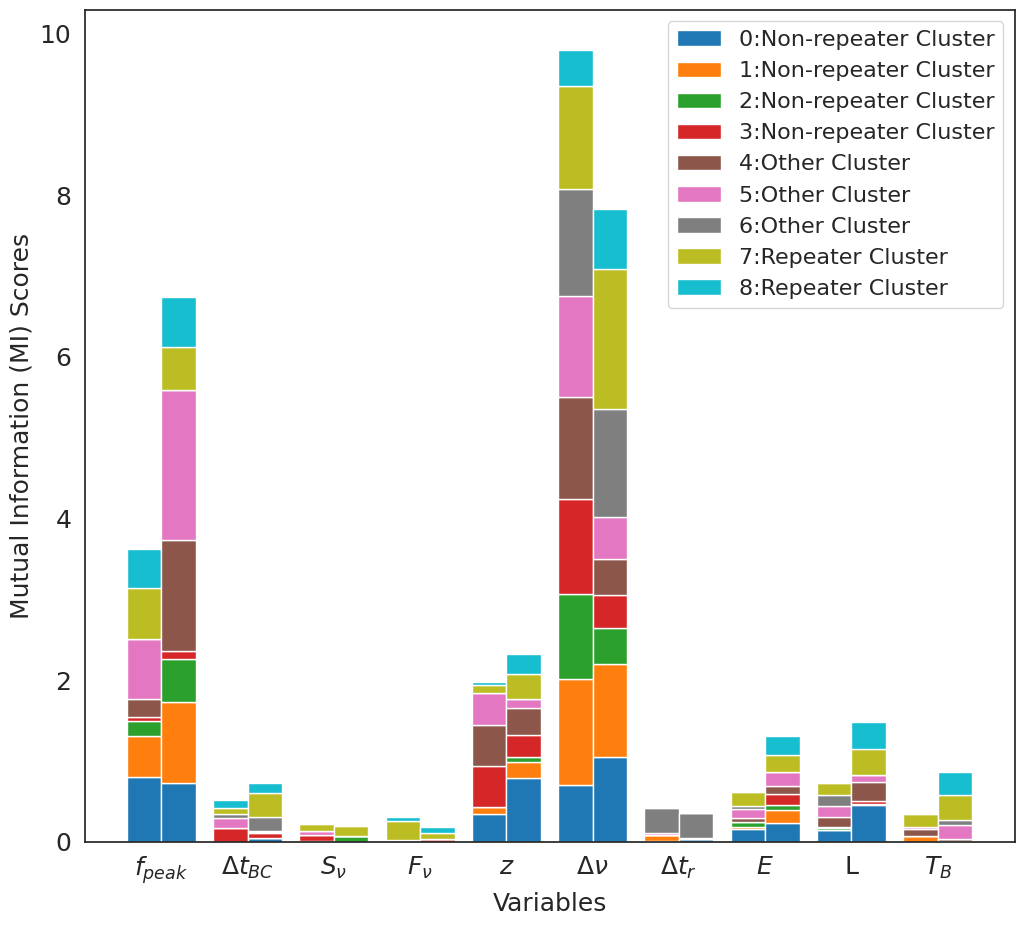

In [20]:
from unml import get_mi_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Parameters
p = 12
colx = [
    r'$f_{peak}$', r'$\Delta t_{BC}$', r'$S_{\nu} $', r'$F_{\nu} $', r'$z$',
    r'$\Delta \nu$', r'$\Delta t_r$', r'$E$', r'L', r'$T_B$'
]
sns.set(context='notebook', style='white', rc={'figure.figsize': (p, 0.9 * p)})
width = 0.4
x = np.arange(len(colx))
fig, ax = plt.subplots()

# Legend labels
lgf = (
    [str(i) + ':Non-repeater Cluster' for i in nrp_lb] +
    [str(i) + ':Other Cluster' for i in oth_lb] +
    [str(i) + ':Repeater Cluster' for i in rp_lb]
)

# Colormap for dynamic coloring
cmap = cm.get_cmap('tab10', np.max(n_labels) - np.min(n_labels) + 1)
color = [cmap(i) for i in range(np.max(n_labels) - np.min(n_labels) + 1)]

# Plotting for axis='x'
for i in range(np.min(n_labels), np.max(n_labels) + 1):
    mi_score = get_mi_score(cat1_data, label=i, embedding=clf[['x', 'y']], labels_list=n_labels, axis='x')
    bar_color = color[i - np.min(n_labels)]  # Dynamically assign colors
    if i == np.min(n_labels):
        rects1 = ax.bar(x - width / 2, mi_score['x'], width, label='label' + str(i), color=bar_color)
        bt = mi_score['x']
    else:
        rects1 = ax.bar(x - width / 2, mi_score['x'], width, label='label' + str(i), color=bar_color, bottom=bt)
        bt = bt + mi_score['x'].values

# Plotting for axis='y'
for i in range(np.min(n_labels), np.max(n_labels) + 1):
    mi_score = get_mi_score(cat1_data, label=i, embedding=clf[['x', 'y']], labels_list=n_labels, axis='y')
    bar_color = color[i - np.min(n_labels)]  # Dynamically assign colors
    if i == np.min(n_labels):
        rects2 = ax.bar(x + width / 2, mi_score['y'], width, label='label' + str(i), color=bar_color)
        bt = mi_score['y']
    else:
        rects2 = ax.bar(x + width / 2, mi_score['y'], width, label='label' + str(i), color=bar_color, bottom=bt)
        bt = bt + mi_score['y'].values

# Final adjustments and saving the figure
ax.legend(lgf, loc='best', fontsize=fs - 2)
ax.set_xlabel('Variables', fontsize=fs)
plt.tick_params(labelsize=fs)
ax.set_ylabel('Mutual Information (MI) Scores', fontsize=fs)
ax.set_xticks(x)
ax.set_xticklabels(colx)
plt.show()


#ALL RESULT

In [24]:
tf=clf[['repeater','UMAP_HDBSCAN_c']]
tf.columns=['repeater','UMAP_HDBSCAN']
tf.to_csv(r'UMAP_labels.csv',index=False)
tf.head()

,repeater,UMAP_HDBSCAN
0,non-repeater,5
1,non-repeater,0
2,non-repeater,6
3,non-repeater,5
4,non-repeater,0


In [25]:
clf['UMAP_HDBSCAN']=np.zeros(len(clf['UMAP_HDBSCAN_c']))
for i in range(len(clf['repeater'].values)):
    if (clf.loc[i,'UMAP_HDBSCAN_c'] in rp_lb):
        clf.loc[i,'UMAP_HDBSCAN']=1#repeater
    elif(clf.loc[i,'UMAP_HDBSCAN_c'] in nrp_lb):
        clf.loc[i,'UMAP_HDBSCAN']=-1#non-repeater
clf.head()

,x,y,repeater,UMAP_HDBSCAN_c,UMAP_HDBSCAN
0,2.089643,5.198382,non-repeater,5,0.0
1,-2.548895,4.469578,non-repeater,0,-1.0
2,7.479288,4.627723,non-repeater,6,0.0
3,2.191747,5.591364,non-repeater,5,0.0
4,-2.622622,4.475039,non-repeater,0,-1.0


In [26]:
clf.drop(columns=['UMAP_HDBSCAN_c','x','y'],inplace=True)
clf.head()

,repeater,UMAP_HDBSCAN
0,non-repeater,0.0
1,non-repeater,-1.0
2,non-repeater,0.0
3,non-repeater,0.0
4,non-repeater,-1.0


In [27]:
clf.to_csv(r'UMAP_result.csv',index=False)